# Import libraries needed

In [1]:
# basic library
import pandas as pd
import numpy as np

# data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import folium
# from folium import plugins
# import plotly.express as px
# import plotly.graph_objects as go

# manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
urlConfirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
urlDeaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
urlRecovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
# Read the dataset from github
globalConfirmed = pd.read_csv(urlConfirmed)
globalDeaths = pd.read_csv(urlDeaths)
globalRecovered = pd.read_csv(urlRecovered)

# Drop unuseful columns in this analysis
globalConfirmed.drop(columns=['Lat','Long','Province/State'], inplace=True)
globalDeaths.drop(columns=['Lat','Long','Province/State'], inplace=True)
globalRecovered.drop(columns=['Lat','Long','Province/State'], inplace=True)

# Group data by country and sum the total case (because there are some country data with different regions).
# Transpose it so that the countries become columns
globalConfirmedByCountries = globalConfirmed.groupby('Country/Region').sum().transpose()
globalDeathsByCountries = globalDeaths.groupby('Country/Region').sum().transpose()
globalRecoveredByCountries = globalRecovered.groupby('Country/Region').sum().transpose()

# Assign eu countires into the variable 'eu'
# eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden','United Kingdom']

# # Extract eu countries' data
# euConfirmed = globalConfirmedByCountries[eu]
# euDeaths = globalDeathsByCountries[eu]
# euRecovered = globalRecoveredByCountries[eu]

# # Extract the latest data (thus iloc[-1][:]) which is the equivalent of total number (cumulative)
# numOfEuConfirmed = np.array(euConfirmed.iloc[-1][:])
# numOfEuDeaths = np.array(euDeaths.iloc[-1][:])
# numOfEuRecovered = np.array(euRecovered.iloc[-1][:])

numOfGlobalConfirmed = np.array(globalConfirmedByCountries.iloc[-1][:])
numOfGlobalDeaths = np.array(globalDeathsByCountries.iloc[-1][:])
numOfGlobalRecovered = np.array(globalRecoveredByCountries.iloc[-1][:])

listOfCountries = list(globalConfirmedByCountries.columns)

globalConfirmedByCountriesDateIncluded = globalConfirmedByCountries.reset_index().rename(columns={'index':'Date'})
globalDeathsByCountriesDateIncluded = globalDeathsByCountries.reset_index().rename(columns={'index':'Date'})
globalRecoveredByCountriesDateIncluded = globalRecoveredByCountries.reset_index().rename(columns={'index':'Date'})

globalActiveCases = (globalConfirmedByCountries - globalDeathsByCountries - globalRecoveredByCountries)
globalActiveCases = globalActiveCases.reset_index().rename(columns={'index':'Date'})

In [5]:
globalConfirmedByCountriesDateIncluded.to_csv('confirmed.csv')

In [ ]:
# Organise a global dataset 
barGlobalData = pd.DataFrame({'Country':listOfCountries, 
                          'Total Confirmed':numOfGlobalConfirmed, 
                          'Total Deaths':numOfGlobalDeaths,
                          'Total Recovered':numOfGlobalRecovered})

In [ ]:
# barplot visualisation
fig, ax = plt.subplots(figsize=(16,8))
size = 200000
data = barGlobalData[barGlobalData['Total Confirmed']> size]
data.sort_values('Total Confirmed', ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed", y="Country", data=data, label="Total", color='g')

sns.set_color_codes('muted')
sns.barplot(x="Total Deaths", y='Country', data=data, label='Deaths', color='r')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlabel= 'Cases', ylabel='Country')
sns.despine(left=True, bottom=True)

# plt.savefig('Totaldeaths.png')

In [ ]:
# barplot visualisation
fig, ax = plt.subplots(figsize=(16,8))
size = 100000
data = barGlobalData[barGlobalData['Total Confirmed']> size]
data.sort_values('Total Confirmed', ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed", y="Country", data=data, label="Total", color='r')

sns.set_color_codes('muted')
sns.barplot(x="Total Recovered", y='Country', data=data, label='Recovered', color='g')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlabel= 'Cases', ylabel='Country')
sns.despine(left=True, bottom=True)

# Daily new cases

In [5]:
dftd = globalConfirmedByCountries.reset_index().drop(columns=['index']).iloc[1:][:]
dfyst = globalConfirmedByCountries.reset_index().drop(columns=['index']).iloc[:-1][:]

dftd = dftd.reset_index().drop(columns=['index'])
dfyst = dfyst.reset_index().drop(columns=['index'])

dailyGlobalNewCases = dftd - dfyst
date = pd.DataFrame({'Date':globalConfirmedByCountries.index[1:]})
frames = [date, dailyGlobalNewCases]
dailyGlobalNewCases = pd.concat(frames, axis=1)

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(40,30))
uk = sns.barplot(x="Date", y="United Kingdom", data=dailyGlobalNewCases, ci=False, ax=ax[0])
uk.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='right');

italy = sns.barplot(x="Date", y="Italy", data=dailyGlobalNewCases, ci=False, ax=ax[1])
italy.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='right');

germany = sns.barplot(x="Date", y="Russia", data=dailyGlobalNewCases, ci=False, ax=ax[2])
germany.set_xticklabels(germany.get_xticklabels(), rotation=90, horizontalalignment='right');

sk = sns.barplot(x="Date", y="Korea, South", data=dailyGlobalNewCases, ci=False, ax=ax[3])
sk.set_xticklabels(sk.get_xticklabels(), rotation=90, horizontalalignment='right');

ax[0].set_title('Daily New Cases',fontsize=30)

# ax[1].set_title('Italy',fontsize=30)
# ax[2].set_title('Russia',fontsize=30)
# ax[3].set_title('South Korea',fontsize=30);

fig.tight_layout(pad=3.0)

# fig.savefig('dailycases.png')

In [ ]:
fig = plt.figure(figsize=(20,8))
uk = sns.barplot(x="Date", y="United Kingdom", data=dailyEuNewCases, ci=False)
uk.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='right');

fig = plt.figure(figsize=(20,8))
italy = sns.barplot(x="Date", y="Italy", data=dailyEuNewCases, ci=False)
italy.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='right');

fig = plt.figure(figsize=(20,8))
spain = sns.barplot(x="Date", y="Spain", data=dailyEuNewCases, ci=False)
spain.set_xticklabels(spain.get_xticklabels(), rotation=90, horizontalalignment='right');

fig = plt.figure(figsize=(20,8))
france = sns.barplot(x="Date", y="France", data=dailyEuNewCases, ci=False)
france.set_xticklabels(france.get_xticklabels(), rotation=90, horizontalalignment='right');

fig = plt.figure(figsize=(20,8))
germany = sns.barplot(x="Date", y="Germany", data=dailyEuNewCases, ci=False)
germany.set_xticklabels(germany.get_xticklabels(), rotation=90, horizontalalignment='right');

# Plotly 

In [ ]:
fig = px.bar(dailyEuNewCases, x='Date', y='United Kingdom', barmode='group', height=400)
fig.update_layout(title_text='UK Covid-19 Daily Increases ')
fig.show()

fig = px.bar(dailyEuNewCases, x='Date', y='Spain', barmode='group', height=400)
fig.update_layout(title_text='Spain Covid-19 Daily Increases ')
fig.show()

fig = px.bar(dailyEuNewCases, x='Date', y='Italy', barmode='group', height=400)
fig.update_layout(title_text='Italy Covid-19 Daily Increases ')
fig.show()

fig = px.bar(dailyEuNewCases, x='Date', y='France', barmode='group', height=400)
fig.update_layout(title_text='France Covid-19 Daily Increases ')
fig.show()

fig = px.bar(dailyEuNewCases, x='Date', y='Germany', barmode='group', height=400)
fig.update_layout(title_text='Germany Covid-19 Daily Increases ')
fig.show()

# Total cases charts

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))

data = globalConfirmedByCountriesDateIncluded

uk = sns.barplot(x="Date", y="United Kingdom", data=data, ci=False, color = 'midnightblue', label='UK')
uk.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='left');

russia = sns.barplot(x="Date", y="Russia", data=data, ci=False, color= 'red', label='RU',alpha=0.70)
# russia.set_xticklabels(italy.get_xticklabels(), rotation=90, horizontalalignment='right');

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax.set_title('COVID-19 Total Cases From Jan 22 To June 04', pad=20, fontsize=20)
ax.set_xlabel('Date',labelpad=20, fontsize=10)
ax.set_ylabel('Total Cases',labelpad=20, fontsize=20)
ax.legend(loc='upper left', fontsize=20)
ax.tick_params(
        axis='y',          
        which='both',      
        labelsize = 14)

plt.savefig('uk_ru_compared_jun04')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))

data = pd.DataFrame(columns=['Date','Difference'])
data['Date'] = globalConfirmedByCountriesDateIncluded['Date'][-30:]
data['Diff'] = (globalConfirmedByCountriesDateIncluded['United Kingdom'] - globalConfirmedByCountriesDateIncluded['Russia'])[-30:]

dif = sns.barplot(x="Date", y="Diff", data=data, ci=False, color = 'royalblue', label='Difference between UK and Russia')
uk.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='left');

ax.set_xlabel('Jan 22 - May 07',labelpad=20, fontsize=20)
ax.set_ylabel('Number of cases',labelpad=20, fontsize=20)
ax.legend(loc='upper left', fontsize=20)

# plt.savefig('uk_ru_compared')

plt.show()

In [ ]:
# USA chart total cases
fig, ax = plt.subplots(figsize=(25,10))
data = globalConfirmedByCountriesDateIncluded

us = sns.barplot(x='Date', y='US', data=data)
us.set_xticklabels(us.get_xticklabels(), rotation=90, horizontalalignment='left');

# uk = sns.barplot(x="Date", y="United Kingdom", data=data, ci=False, color = 'forestgreen', label='UK')

plt.show();

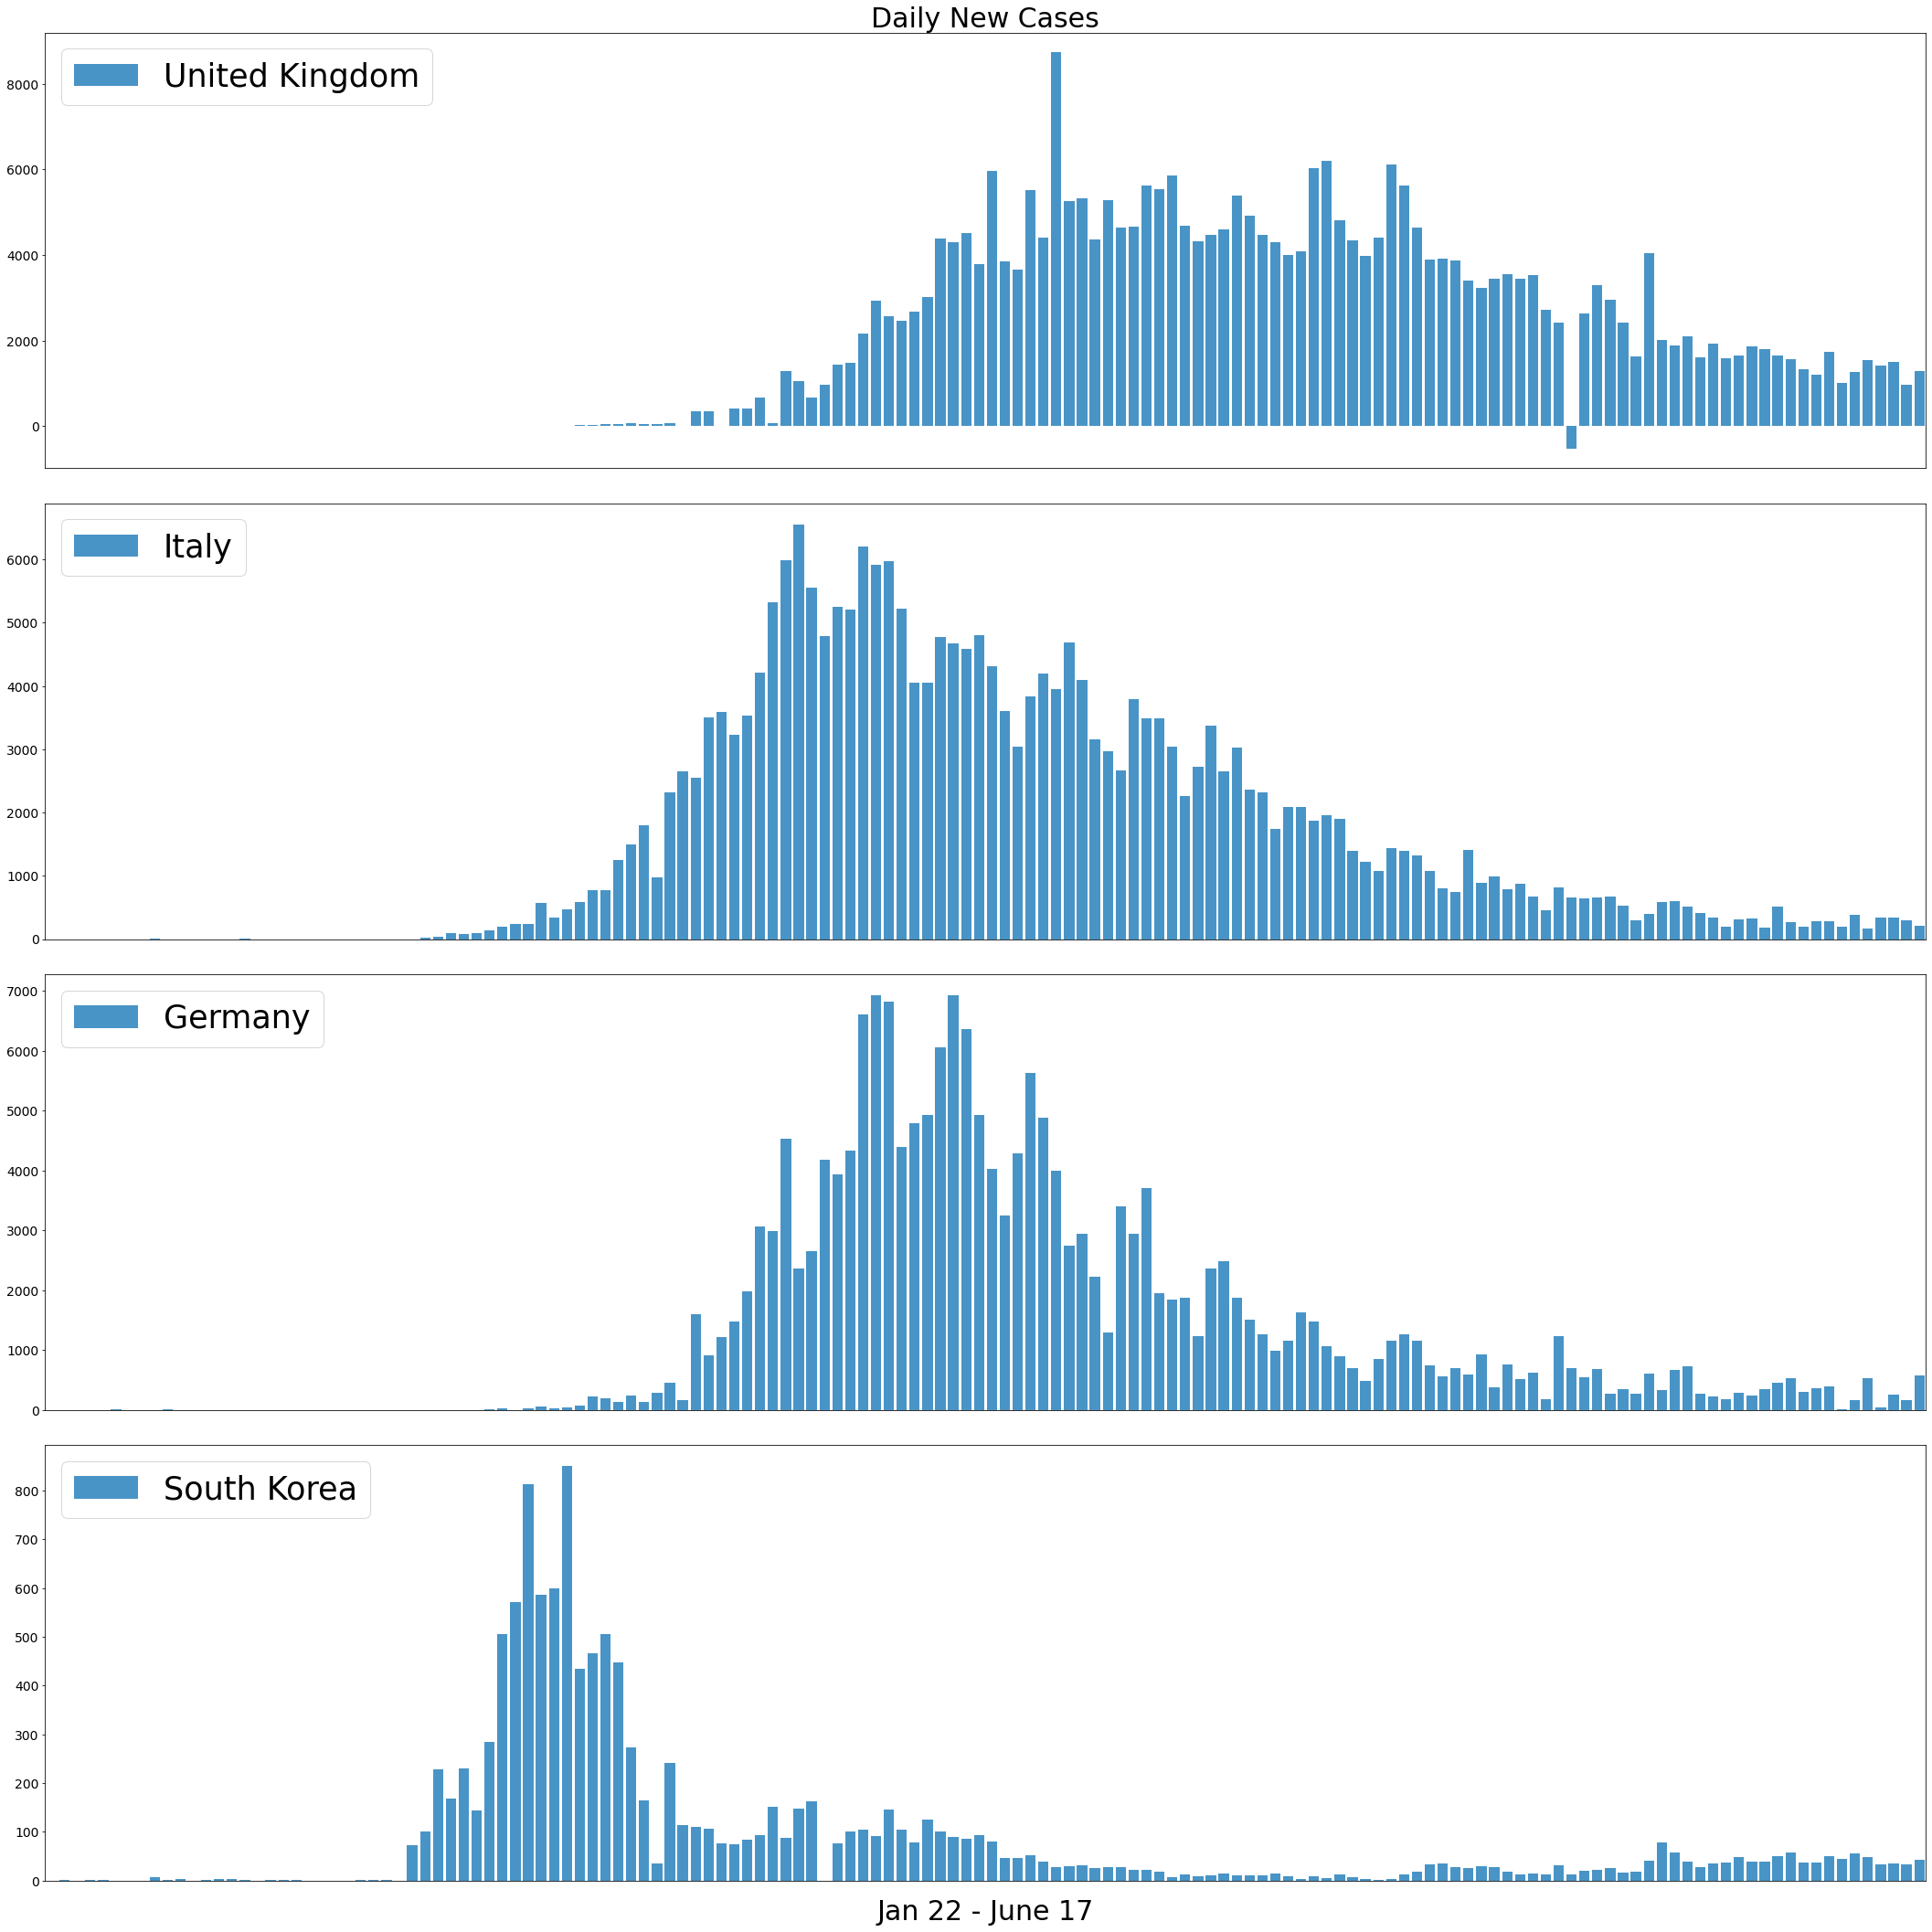

In [10]:
# Daily new cases

fig, ax = plt.subplots(4,1, figsize=(30,30))
uk = sns.barplot(x="Date", y="United Kingdom", data=dailyGlobalNewCases, ci=False, ax=ax[0], label='United Kingdom',color='#3498db')


italy = sns.barplot(x="Date", y="Italy", data=dailyGlobalNewCases, ci=False, ax=ax[1], label='Italy',color='#3498db')


germany = sns.barplot(x="Date", y="Germany", data=dailyGlobalNewCases, ci=False, ax=ax[2], label='Germany',color='#3498db')


sk = sns.barplot(x="Date", y="Korea, South", data=dailyGlobalNewCases, ci=False, ax=ax[3], label='South Korea',color='#3498db')

for i in range(4):
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax[i].tick_params(
        axis='y',          
        which='both',      
        labelsize = 14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend(loc='upper left', fontsize=35)
    
ax[3].set_xlabel('Jan 22 - June 17', labelpad = 20, fontsize=30)

ax[0].set_title('Daily New Cases',fontsize=30)
# ax[1].set_title('Italy',fontsize=30)
# ax[2].set_title('Russia',fontsize=30)
# ax[3].set_title('South Korea',fontsize=30);

fig.tight_layout(pad=3.0)

fig.savefig('dailycases_jun17.png')

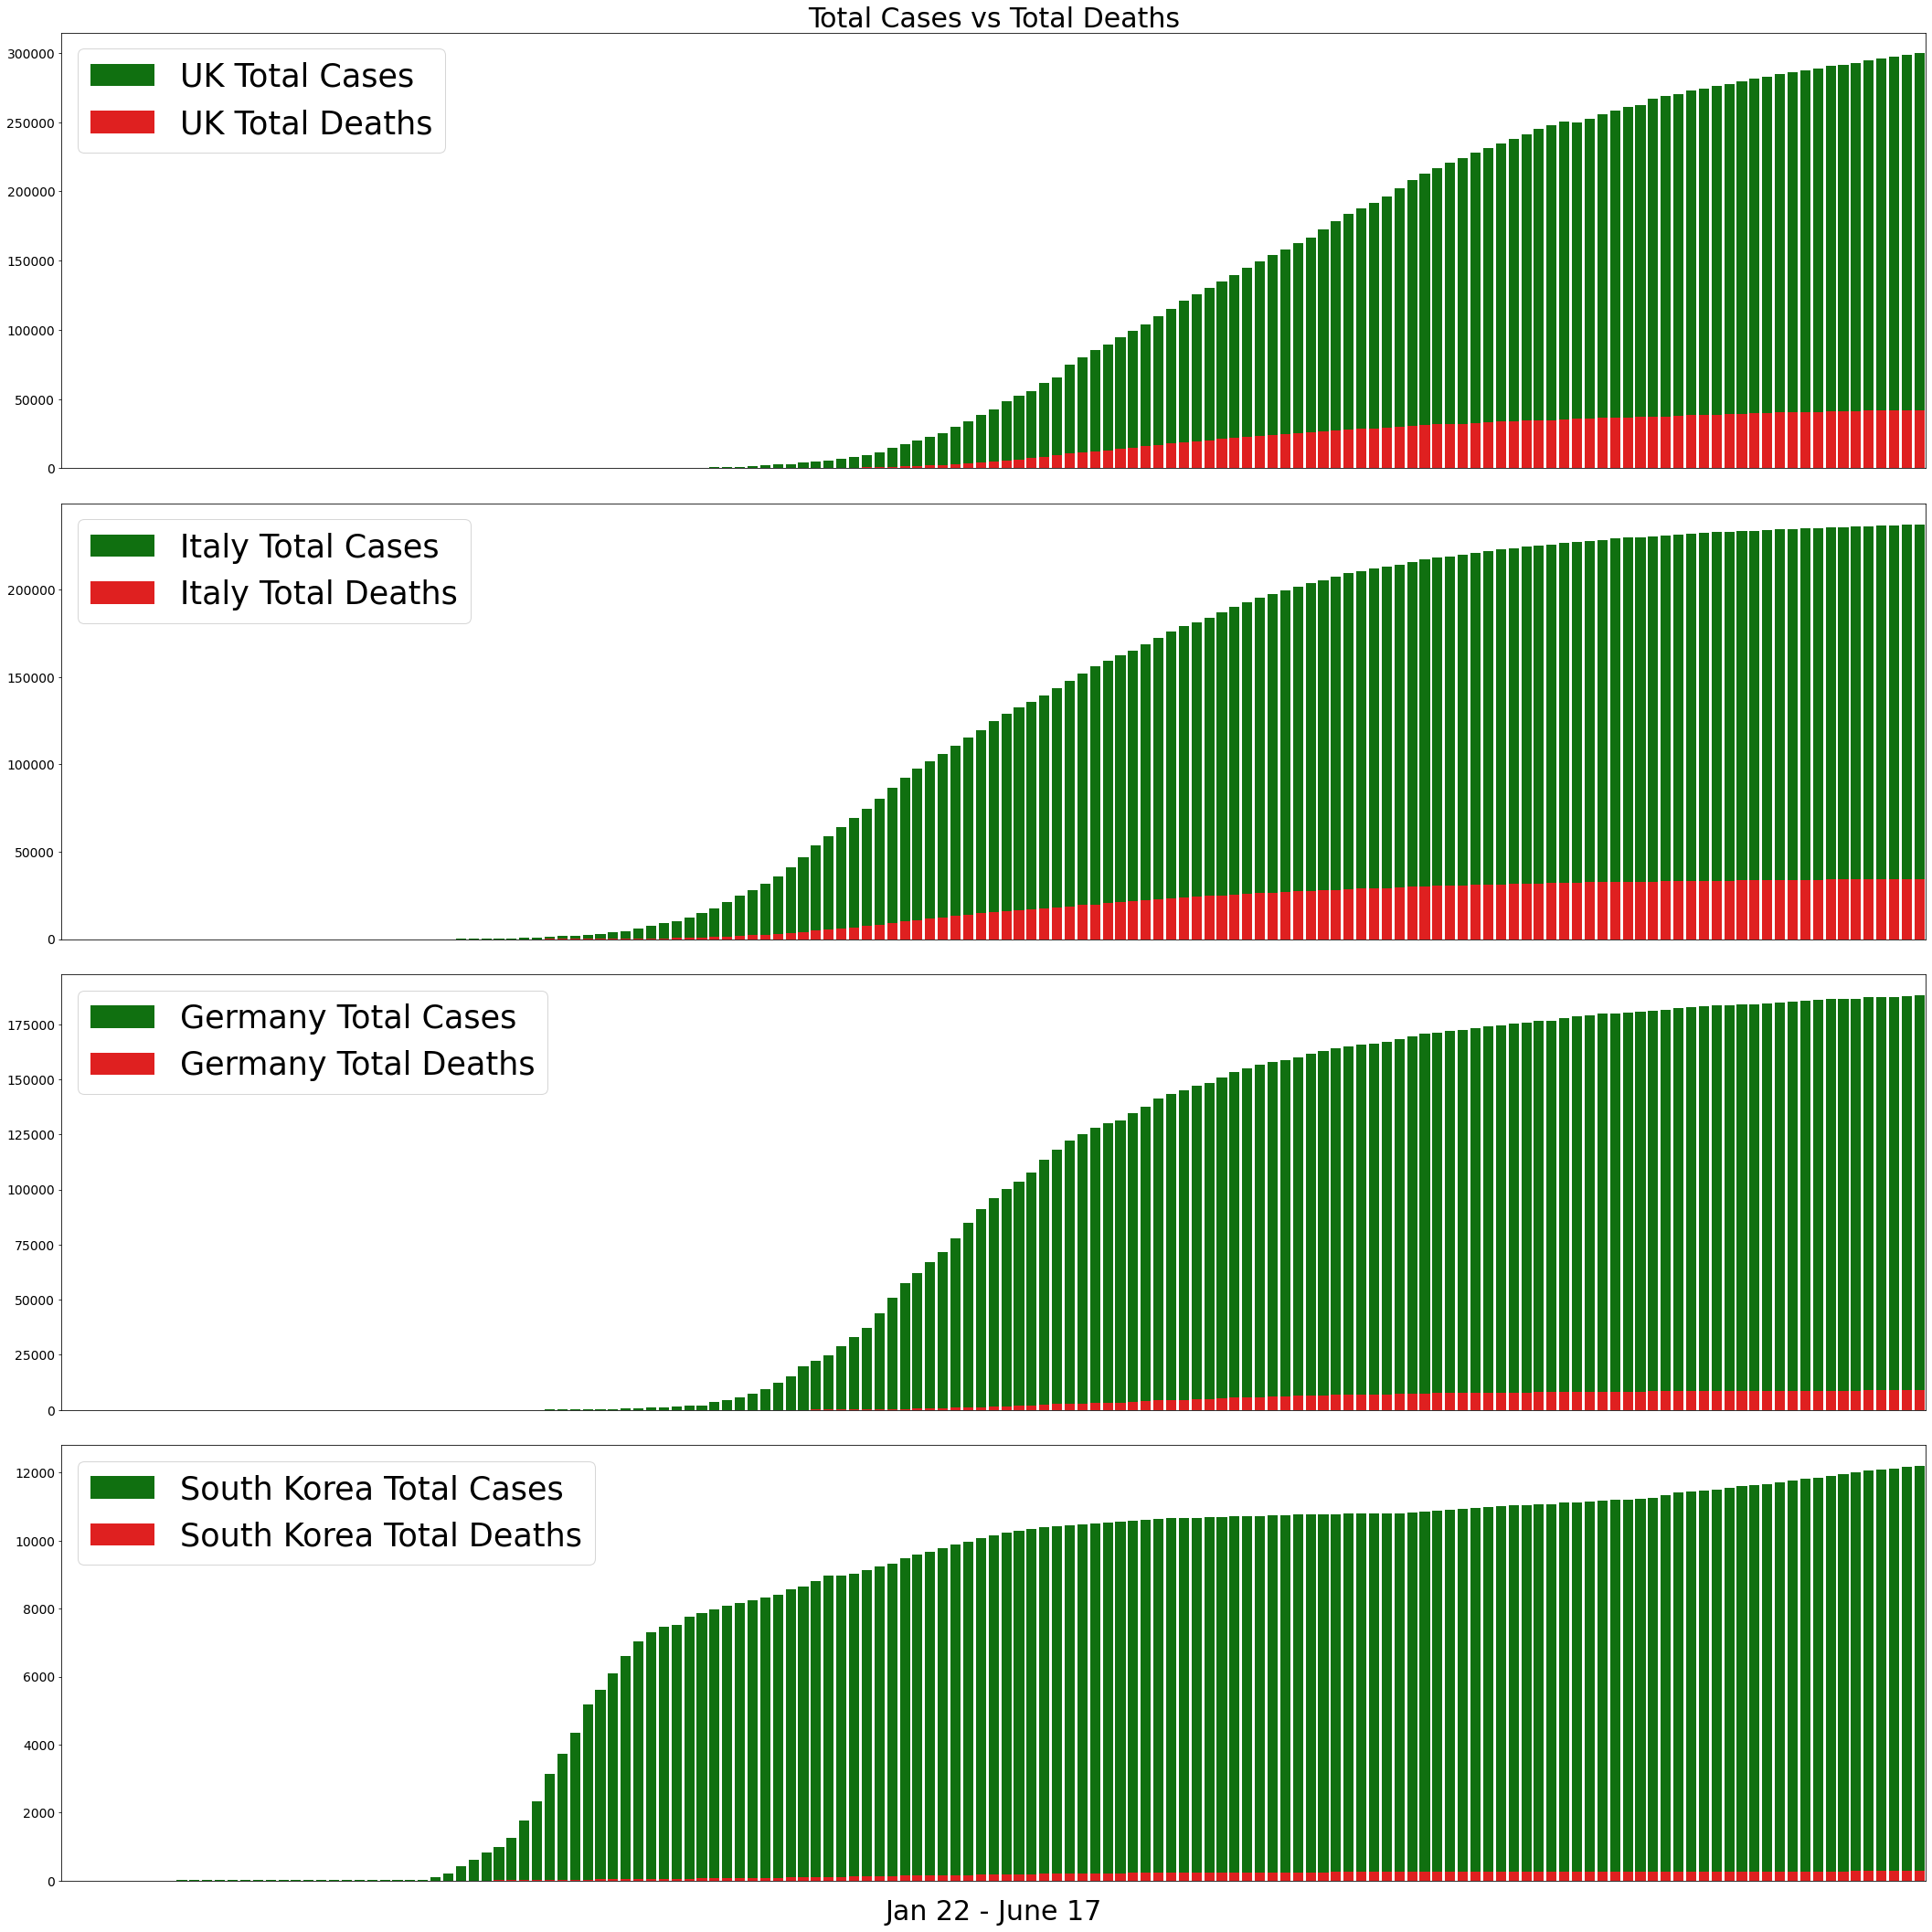

In [11]:
# total cases + death
# seaborn charts
fig, ax = plt.subplots(4,1, figsize=(30,30))

dataC = globalConfirmedByCountriesDateIncluded
dataD = globalDeathsByCountriesDateIncluded

uk = sns.barplot(x="Date", y="United Kingdom", data=dataC, ci=False, ax=ax[0], label='UK Total Cases',color='g')
ukd = sns.barplot(x="Date", y="United Kingdom", data=dataD, ci=False, ax=ax[0], label='UK Total Deaths',color='r')
# uk.set_xticklabels(uk.get_xticklabels(), rotation=90, horizontalalignment='right');

italy = sns.barplot(x="Date", y="Italy", data=dataC, ci=False, ax=ax[1], label='Italy Total Cases',color='g')
italyd = sns.barplot(x="Date", y="Italy", data=dataD, ci=False, ax=ax[1], label='Italy Total Deaths',color='r')
# italy.set_xticklabels(italy.get_xticklabels(), rotation=90, horizontalalignment='right');

germany = sns.barplot(x="Date", y="Germany", data=dataC, ci=False, ax=ax[2], label='Germany Total Cases',color='g')
germanyd = sns.barplot(x="Date", y="Germany", data=dataD, ci=False, ax=ax[2], label='Germany Total Deaths',color='r')
# germany.set_xticklabels(germany.get_xticklabels(), rotation=90, horizontalalignment='right');

sk = sns.barplot(x='Date', y='Korea, South', data=dataC, ci=False, ax=ax[3], label='South Korea Total Cases',color='g')
skd = sns.barplot(x='Date', y='Korea, South', data=dataD, ci=False, ax=ax[3], label='South Korea Total Deaths',color='r')
# sk.set_xticklabels(sk.get_xticklabels(), rotation=90, horizontalalignment='right');

for i in range(4):
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax[i].tick_params(
        axis='y',          
        which='both',      
        labelsize = 14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend(loc='upper left', fontsize=35)
#     ax[i].set_ylim(0, 250000)
    
ax[3].set_xlabel('Jan 22 - June 17', labelpad = 20, fontsize=30)


ax[0].set_title('Total Cases vs Total Deaths',fontsize=30)


fig.tight_layout(pad=3.0)

plt.savefig('Total_Cases_jun_17.png')

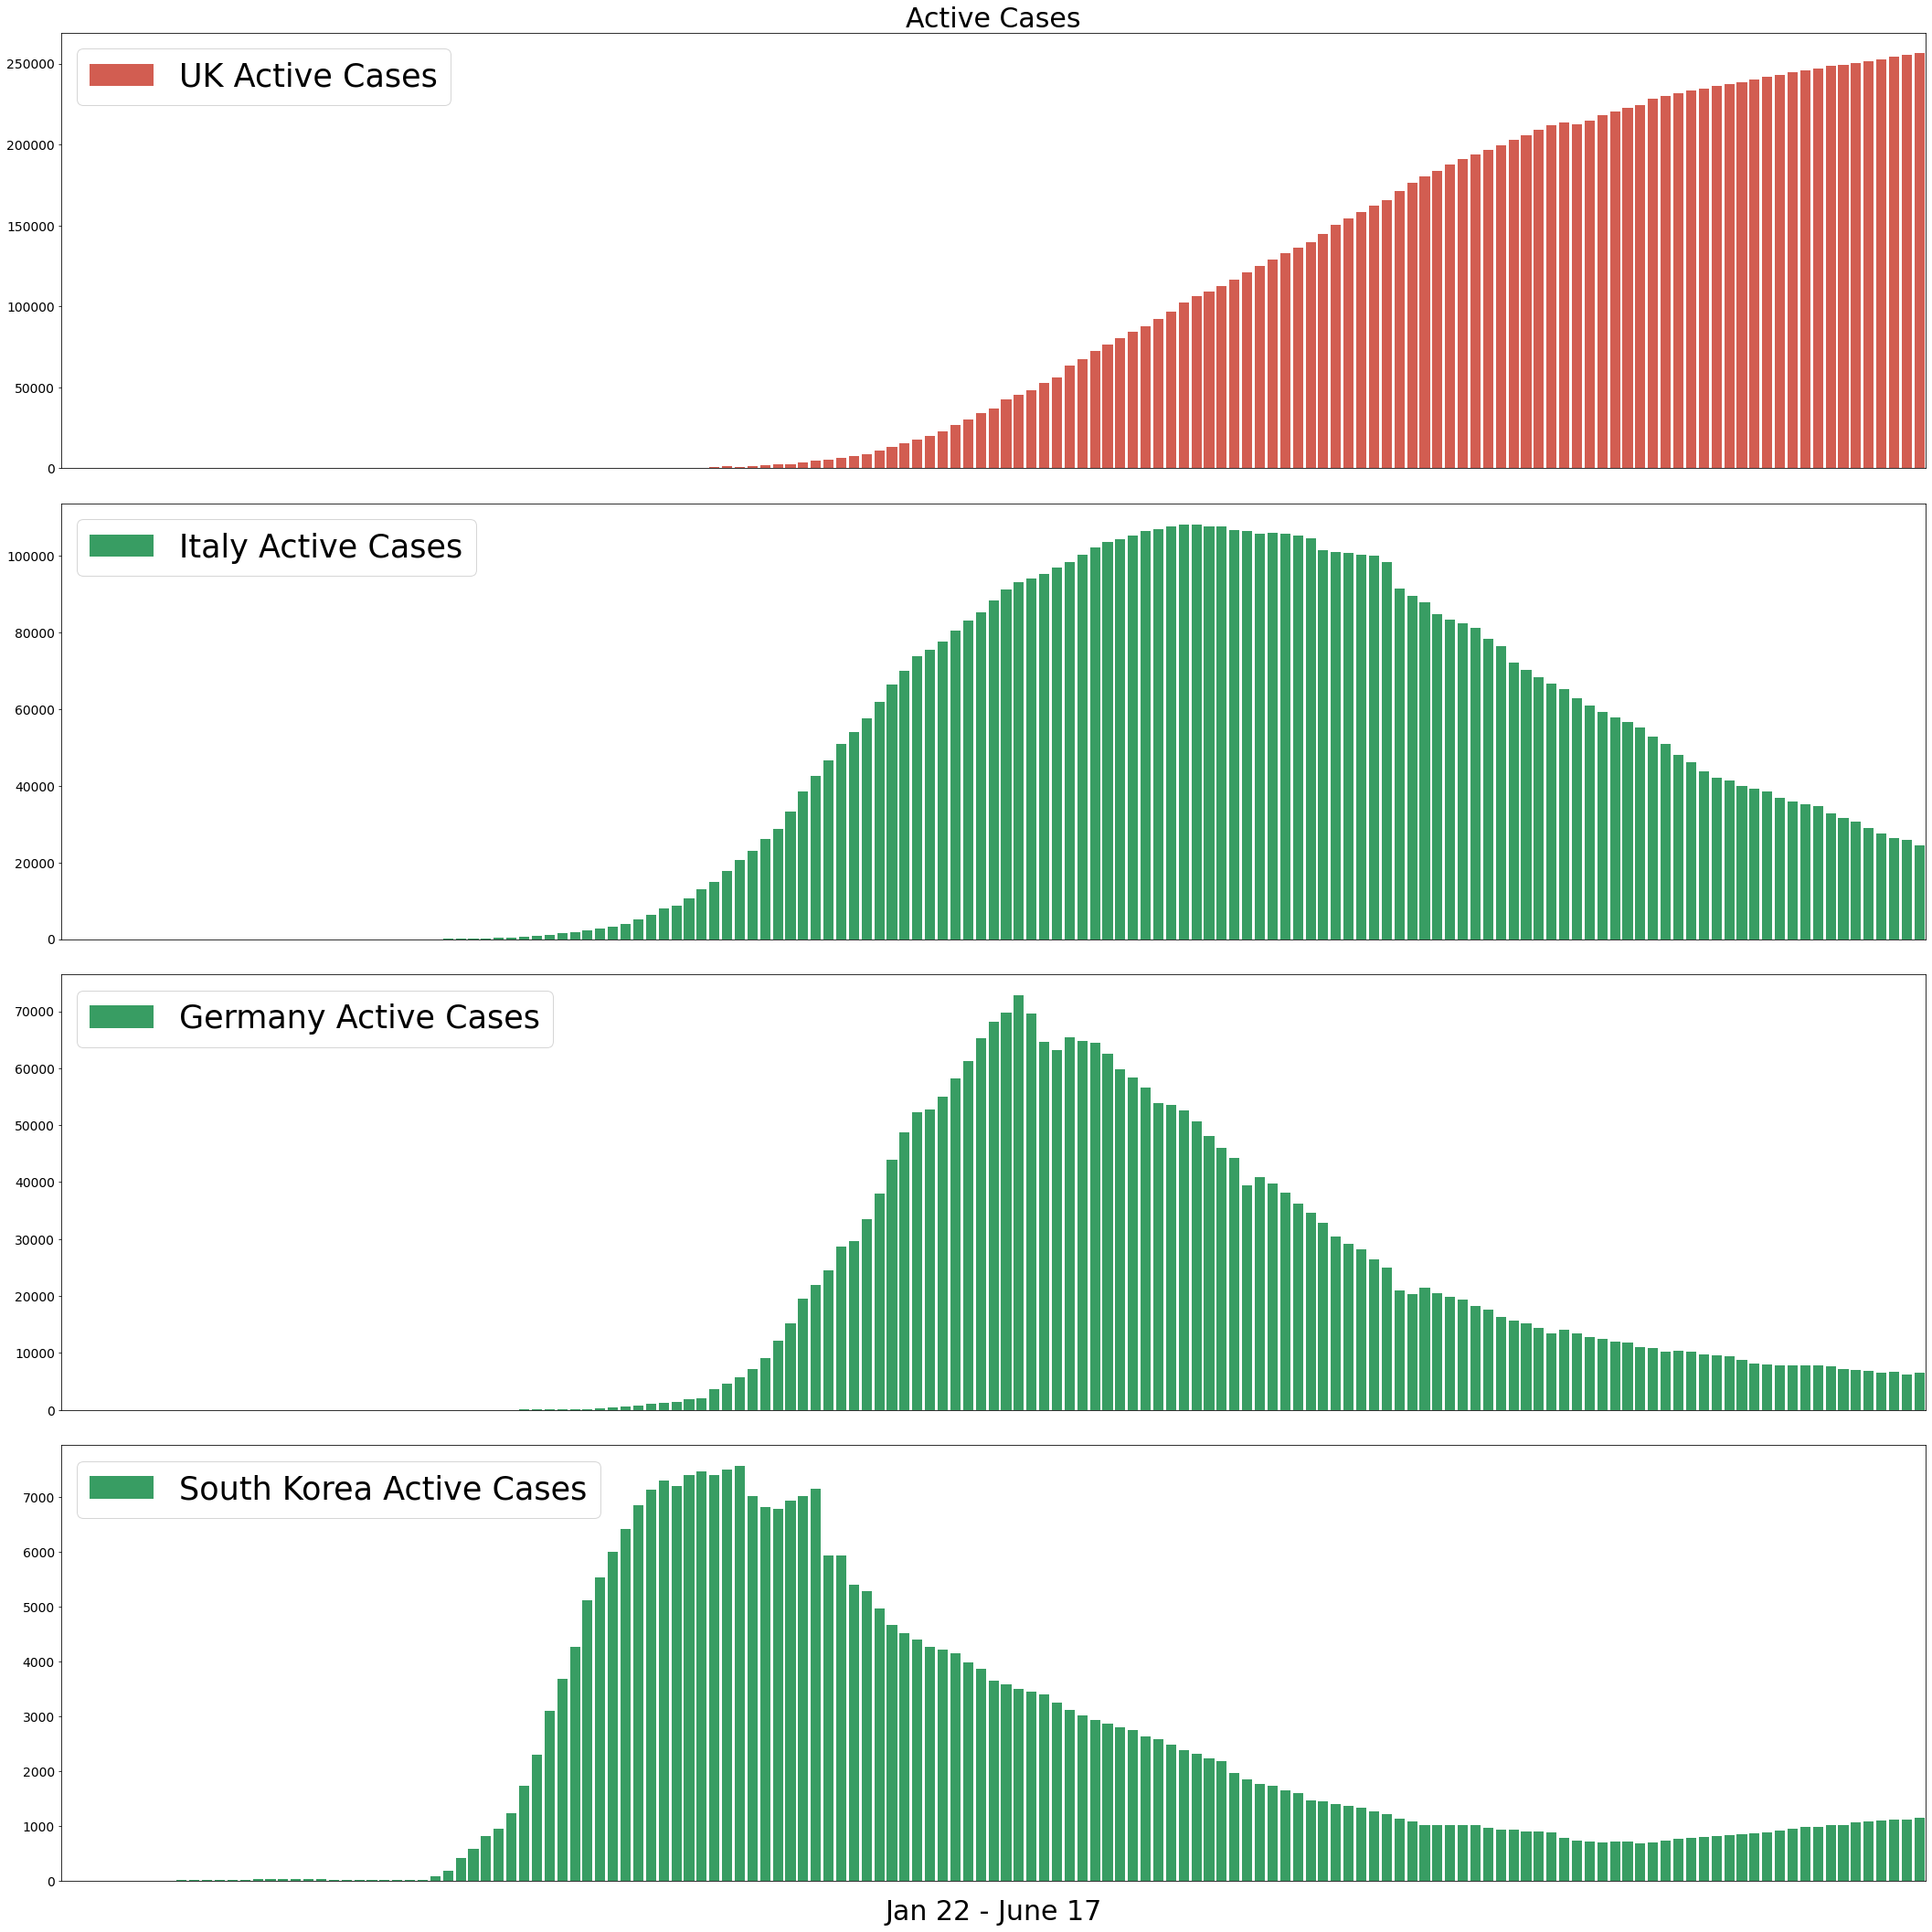

In [12]:
# activate cases
fig, ax = plt.subplots(4,1, figsize=(30,30))

dataA = globalActiveCases

uk = sns.barplot(x="Date", y="United Kingdom", data=dataA, ci=False, ax=ax[0], label='UK Active Cases',color='#e74c3c')

italy = sns.barplot(x="Date", y="Italy", data=dataA, ci=False, ax=ax[1], label='Italy Active Cases',color='#27ae60')

germany = sns.barplot(x="Date", y="Germany", data=dataA, ci=False, ax=ax[2], label='Germany Active Cases',color='#27ae60')

sk = sns.barplot(x='Date', y='Korea, South', data=dataA, ci=False, ax=ax[3], label='South Korea Active Cases',color='#27ae60')

for i in range(4):
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax[i].tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize = 14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend(loc='upper left', fontsize=35)
#     ax[i].set_ylim(0, 250000)
    
ax[3].set_xlabel('Jan 22 - June 17', labelpad = 20, fontsize=30)


ax[0].set_title('Active Cases',fontsize=30)

fig.tight_layout(pad=3.0)

plt.savefig('Active_Cases_jun_17.png')

# Plotly 

In [ ]:
# Plotly

fig = px.bar(euConfirmedDateInc , x='Date', y='United Kingdom', barmode='group', height=400)
fig.update_layout(title_text='UK Covid-19 Total Cases ')
fig.show()

fig = px.bar(euConfirmedDateInc , x='Date', y='Spain', barmode='group', height=400)
fig.update_layout(title_text='Spain Covid-19 Total Cases ')
fig.show()

fig = px.bar(euConfirmedDateInc , x='Date', y='Italy', barmode='group', height=400)
fig.update_layout(title_text='Italy Covid-19 Total Cases ')
fig.show()

fig = px.bar(euConfirmedDateInc , x='Date', y='Germany', barmode='group', height=400)
fig.update_layout(title_text='Germany Covid-19 Total Cases ')
fig.show()

fig = px.bar(euConfirmedDateInc , x='Date', y='France', barmode='group', height=400)
fig.update_layout(title_text='France Covid-19 Total Cases ')
fig.show()

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=euConfirmed.index, y=euConfirmed['United Kingdom'], mode='lines+markers', name='United Kingdom'))
fig.update_layout(title_text = 'UK Covid-19 Total Cases Trend')
fig.show()

In [ ]:
from fbprophet import Prophet

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas. Ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

# Prophet Forecasting

In [ ]:
date = list(globalConfirmedByCountries.reset_index()['index'])

In [ ]:
d_list = []
for i in date:
    x = i.split('/')
    if int(x[0]) >= 10:
        if int(x[1]) >= 10 :
            d = '2020' + '-' + x[0] + '-' + x[1]
            d_list.append(d)
        else:
            d = '2020' + '-' + x[0] + '-' + '0' + x[1]
            d_list.append(d)
    else:
        if int(x[1]) >= 10 :
            d = '2020' + '-' + '0' + x[0] + '-' + x[1]
            d_list.append(d)
        else:
            d = '2020' + '-' + '0' +x[0] + '-' + '0' + x[1]
            d_list.append(d)
        

In [ ]:
euConfirmedDateInc['United Kingdom'].values

In [ ]:
ukConfirmedFcst = pd.DataFrame({'ds':d_list, 'y':euConfirmedDateInc['United Kingdom'].values})

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(ukConfirmedFcst)
future = m.make_future_dataframe(periods=7)
future.tail()

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
# predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe

In [ ]:
ukConfirmedFcstPlot = m.plot(forecast)

In [ ]:
twFcst = pd.DataFrame({'ds':d_list, 'y':globalConfirmedByCountries['Taiwan*'].values})

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(twFcst)
future = m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
# predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
twConfirmedFcstPlot = m.plot(forecast)